# Assignment 4 - Part 1: Airbnb Data Visualization



#### Importing required libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#### Load the Airbnb data from the URL


In [3]:
url = "https://raw.githubusercontent.com/aniketb28/Resources/main/Airbnb_Dataset_19.csv"
Airbnb = pd.read_csv(url)



In [4]:
# Data Cleaning
Airbnb['host_name'] = Airbnb['host_name'].str.replace('&', 'and').str.replace('+', 'and').str.replace('/', 'or')
Airbnb.dropna(axis=0, inplace=True)



C:\Users\prasad bolgss\AppData\Local\Temp\ipykernel_11536\1726998908.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Airbnb['host_name'] = Airbnb['host_name'].str.replace('&', 'and').str.replace('+', 'and').str.replace('/', 'or')


### Exploratory Data Analysis



#### Visualization 1: Distribution of Numerical Columns


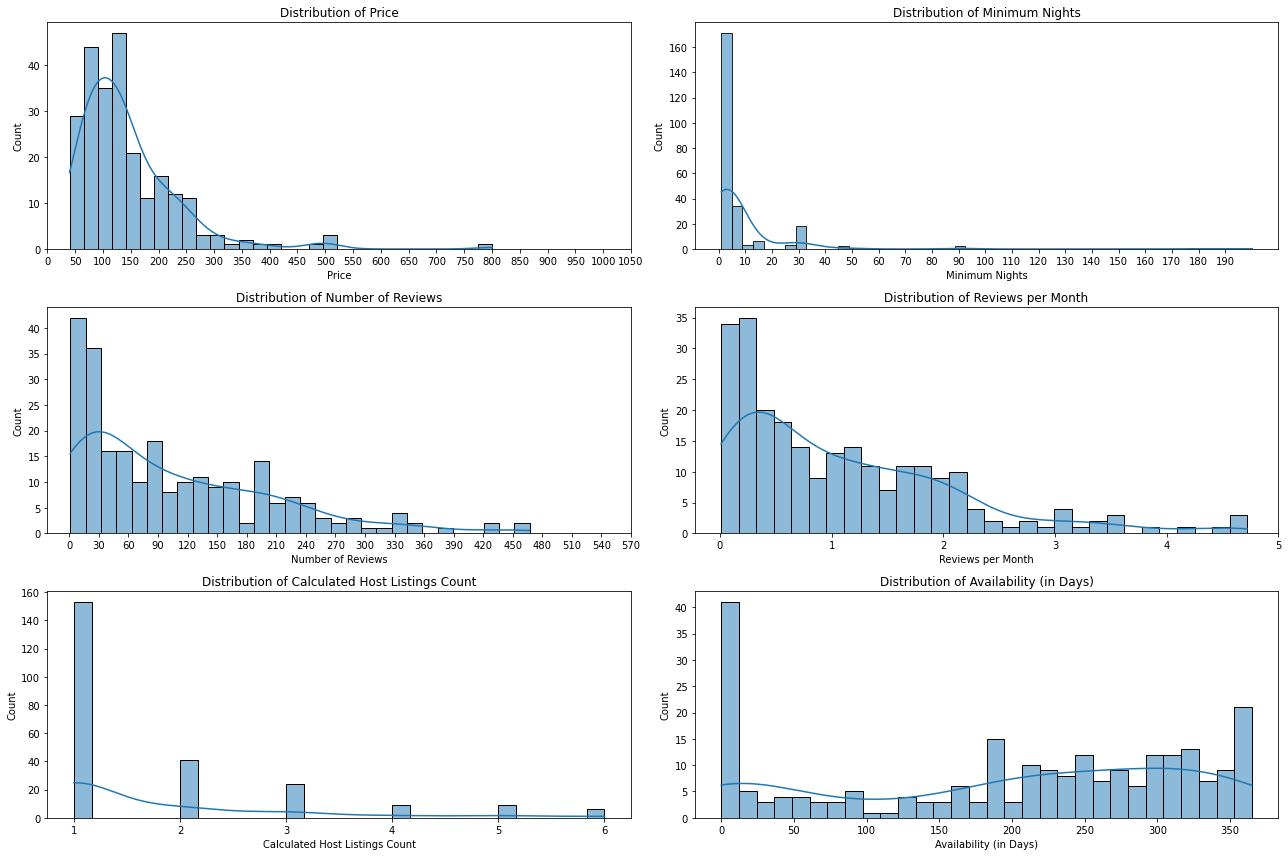

In [5]:
plt.rcParams['figure.figsize'] = [18, 12]

# Create subplots in a 2x3 grid
# Set the figure size for all subplots
plt.rcParams['figure.figsize'] = [18, 12]

# Create subplots in a 2x3 grid
plt.subplot(3, 2, 1)
sns.histplot(Airbnb['price'], bins=30, kde=True)
plt.xticks(range(0, 1100, 50))  # Customize as per your data range
plt.title('Distribution of Price')
plt.xlabel('Price')

plt.subplot(3, 2, 2)
sns.histplot(Airbnb['minimum_nights'], bins=50, kde=True)
plt.xticks(range(0, 200, 10))  # Customize as per your data range
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')

plt.subplot(3, 2, 3)
sns.histplot(Airbnb['number_of_reviews'], bins=30, kde=True)
plt.xticks(range(0, 600, 30))  # Customize as per your data range
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')

plt.subplot(3, 2, 4)
sns.histplot(Airbnb['reviews_per_month'], bins=30, kde=True)
plt.xticks(range(0, 6, 1))  # Customize as per your data range
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')

plt.subplot(3, 2, 5)
sns.histplot(Airbnb['calculated_host_listings_count'], bins=30, kde=True)
plt.title('Distribution of Calculated Host Listings Count')
plt.xlabel('Calculated Host Listings Count')

plt.subplot(3, 2, 6)
sns.histplot(Airbnb['availability_365'], bins=30, kde=True)
plt.title('Distribution of Availability (in Days)')
plt.xlabel('Availability (in Days)')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()
plt.show()



#### Visualization 2: Distribution of Neighbourhood group using Plotly Pie Chart


In [6]:
neighbourhood_group_counts = Airbnb['neighbourhood_group'].value_counts().reset_index()
neighbourhood_group_counts.columns = ['Neighbourhood Group', 'Count']

fig = px.pie(neighbourhood_group_counts, values='Count', names='Neighbourhood Group',
             title='Distribution of Neighborhood Groups',
             custom_data=['Count'],
             labels={'Count': 'Count'})

fig.update_traces(textinfo='label+percent', texttemplate='%{label}: %{percent:.1%} (%{customdata[0]})',
                  textposition='outside')
fig.update_traces(pull=[0.05, 0.05, 0.05, 0.05, 0.05])
fig.show()



#### Visualization 3: Average Rental Price by Region and Room Type using Plotly Bar Chart


In [7]:
Avg_value_region_type = Airbnb[['neighbourhood_group', 'room_type', 'price']].groupby(['neighbourhood_group', 'room_type']).mean().reset_index()
Avg_value_region_type['price'] = Avg_value_region_type['price'].astype(int)
Avg_value_region_type.columns = ['Region', 'Type', 'avg_price']

fig = px.bar(Avg_value_region_type, x='avg_price', y='Region', color='Type', orientation='h',
             labels={'avg_price': 'Average Rental Price', 'Region': 'Region', 'Type': 'Room Type'},
             title='Average Rental Price by Region and Room Type ')

fig.update_traces(texttemplate='%{x:.0f}', textposition='inside')
fig.show()



#### Visualization 4: Relationship between price and reviews using Seaborn Scatter Plot


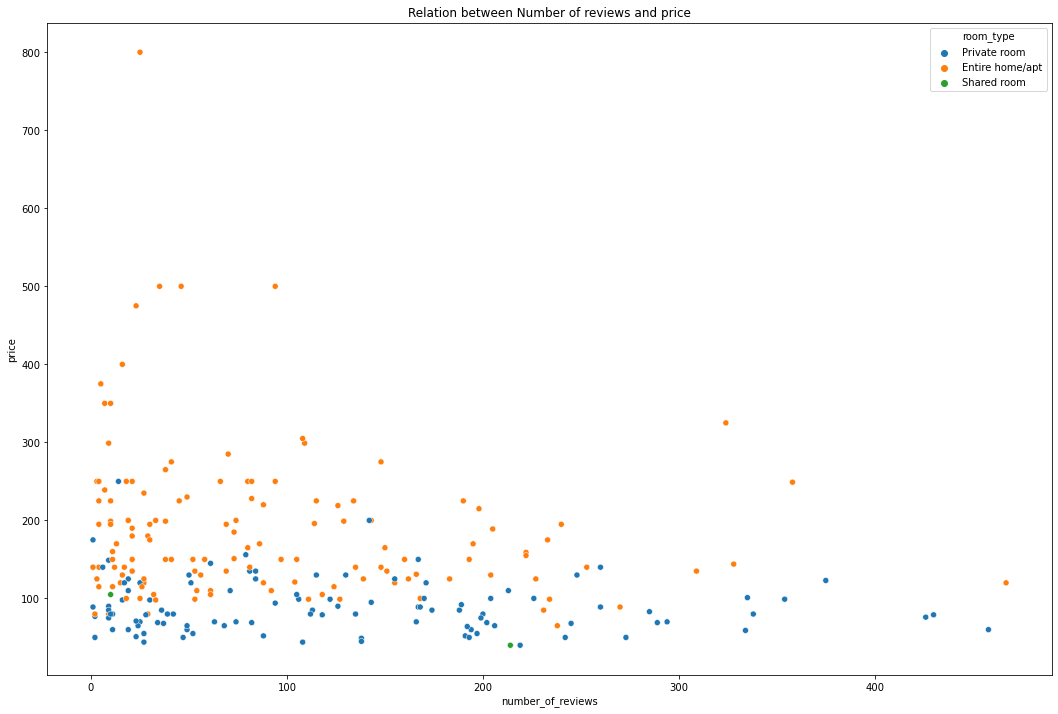

In [8]:
sns.scatterplot(x=Airbnb['number_of_reviews'], y=Airbnb['price'], hue=Airbnb['room_type'])
plt.rcParams['figure.figsize'] = (12, 8)
plt.title('Relation between Number of reviews and price')
plt.show()



#### Visualization 5: Top 10 Most Busiest Hosts using Seaborn Bar Plot


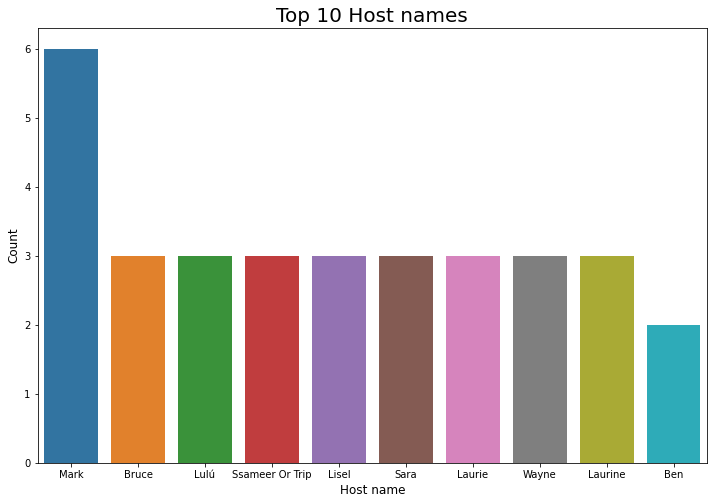

In [9]:
top_10 = Airbnb['host_name'].value_counts().head(10).reset_index()
sns.barplot(data=top_10, x='index', y='host_name')
plt.xlabel('Host name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 10 Host names', fontsize=20)
plt.show()


In [10]:
Airbnb.to_csv('cleane_airbnb')

# Assignment 4 - Part 2: HR Data Visualization



In [11]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the HR dataset from the URL
url = "https://raw.githubusercontent.com/aniketb28/Resources/main/HRDataset_v14.csv"
df = pd.read_csv(url)



#### Data Cleaning


In [12]:
df.drop('DateofTermination', axis=1, inplace=True)
df.drop(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID',
         'FromDiversityJobFairID', 'Termd'], axis=1, inplace=True)
df['Employee_Name'] = df['Employee_Name'].str.split(',').str[::-1].str.join(' ').str.strip()# Employee name has suranme fisrt and then fierstanme also it is separated by commaa fixing this issue





### Visualizations


In [13]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns



#### Create a histogram of the salary distribution


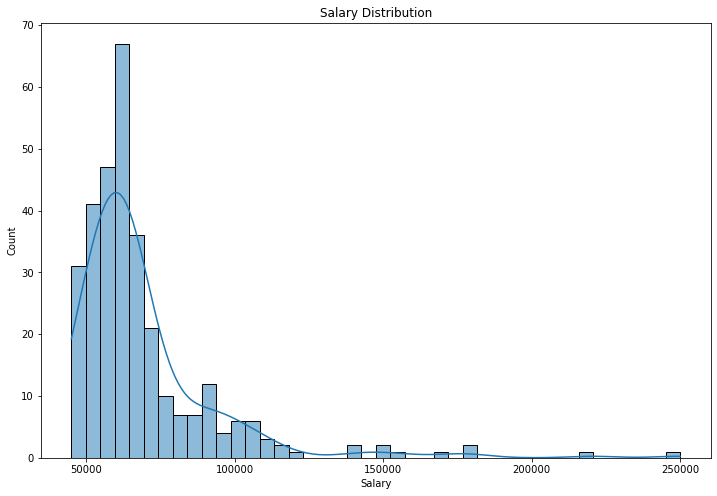

In [14]:
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.show()



#### Create a bar chart of the top recruitment sources


c:\Users\prasad bolgss\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



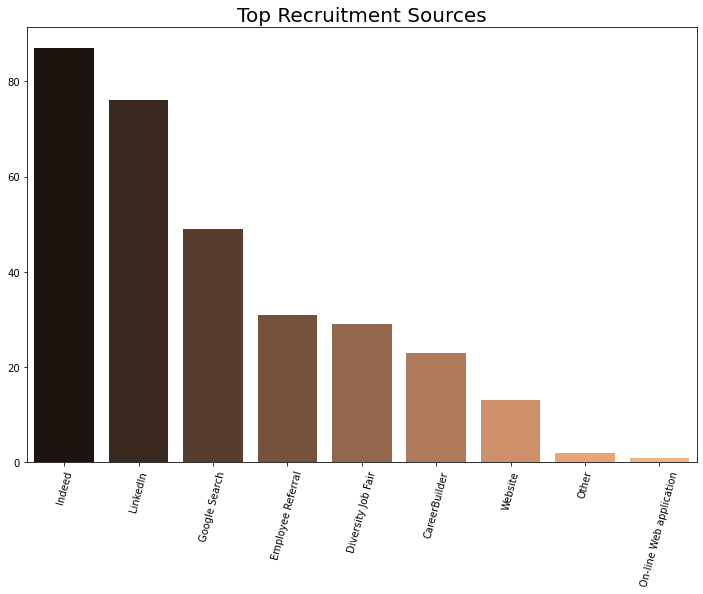

In [15]:
sns.barplot(df['RecruitmentSource'].value_counts().index, df['RecruitmentSource'].value_counts().values, palette='copper')
plt.rcParams['figure.figsize'] = (8, 4)
plt.xticks(rotation=75)
plt.title('Top Recruitment Sources', fontsize=20)
plt.show()



#### Create a violin plot of the distribution of salary by department


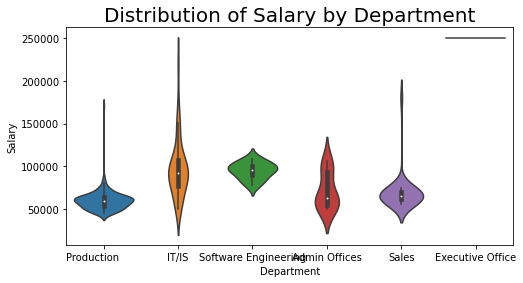

In [16]:
sns.violinplot(x=df['Department'], y=df['Salary'])
plt.rcParams['figure.figsize'] = (20, 8)
plt.title('Distribution of Salary by Department', fontsize=20)
plt.show()



there is high variance in salary of of IT department.
Lets take a deep dive to understand reson behind it.

#### Clean the department column


In [17]:
df['Department'] = df['Department'].str.strip()



#### Create a bar chart of the count of unique positions in each department


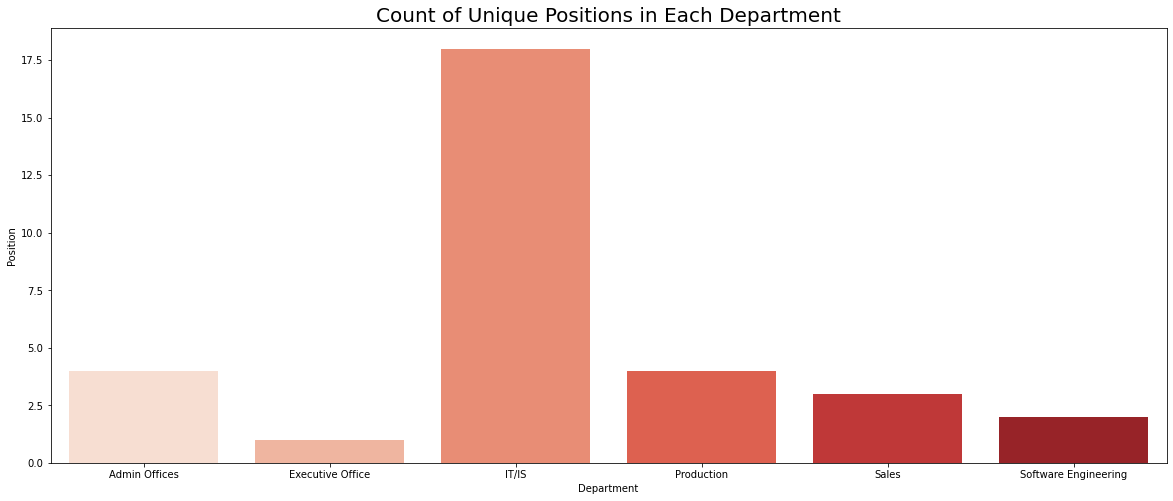

In [18]:
positions_by_Department_count = df[['Position', 'Department']].groupby(['Department']).nunique().reset_index()
sns.barplot(x=positions_by_Department_count['Department'], y=positions_by_Department_count['Position'], palette='Reds')
plt.title('Count of Unique Positions in Each Department', fontsize=20)
plt.show()



By looking at this graph we can clearly see that in IT department there are compariively higher number of positions as compare to other department

#### Calculate the mean employee satisfaction by department


In [19]:
emp_satisfaction_by_department = df[['EmpSatisfaction', 'Department']].groupby('Department').mean().sort_values(by='EmpSatisfaction', ascending=False)

# Display the mean employee satisfaction by department in a heatmap
emp_satisfaction_by_department.style.background_gradient(cmap='copper')


,EmpSatisfaction
Department,
Software Engineering,4.090909
Sales,4.032258
IT/IS,3.960000
Production,3.861244
Admin Offices,3.555556
Executive Office,3.000000


In [25]:
df.to_csv(r'C:\Users\prasad bolgss\OneDrive\Desktop\Internship\Assignmnet4\Cleaned_hr.csv')
Airbnb.to_csv(r'C:\Users\prasad bolgss\OneDrive\Desktop\Internship\Assignmnet4\Cleaned_airbnb.csv')